In [1]:
%pip install wfdb
!git clone https://github.com/MIT-LCP/wfdb-python
%cd wfdb-python

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb
from wfdb import processing

Note: you may need to restart the kernel to use updated packages.


Cloning into 'wfdb-python'...
Updating files:  77% (186/239)
Updating files:  78% (187/239)
Updating files:  79% (189/239)
Updating files:  80% (192/239)
Updating files:  81% (194/239)
Updating files:  82% (196/239)
Updating files:  83% (199/239)
Updating files:  84% (201/239)
Updating files:  85% (204/239)
Updating files:  86% (206/239)
Updating files:  87% (208/239)
Updating files:  88% (211/239)
Updating files:  89% (213/239)
Updating files:  90% (216/239)
Updating files:  91% (218/239)
Updating files:  92% (220/239)
Updating files:  93% (223/239)
Updating files:  94% (225/239)
Updating files:  95% (228/239)
Updating files:  96% (230/239)
Updating files:  97% (232/239)
Updating files:  98% (235/239)
Updating files:  99% (237/239)
Updating files: 100% (239/239)
Updating files: 100% (239/239), done.


c:\Users\jitbh\OneDrive\Documents\GitHub\FinalYearProject---BP-from-ECG-PPG\wfdb-python


In [ ]:
# dbs = wfdb.get_dbs()
# display(dbs)

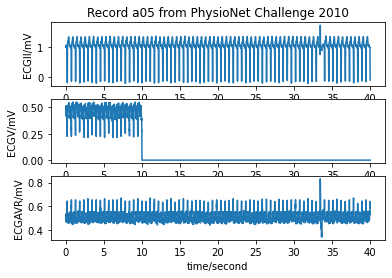

{'record_name': 'ecg-record',
 'n_sig': 3,
 'fs': 125,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 5000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECGII', 'ECGV', 'ECGAVR'],
 'p_signal': array([[ 1.01550624,  0.41976463,  0.53529968],
        [ 1.02172643,  0.45009005,  0.50980392],
        [ 1.0403571 ,  0.45988246,  0.51961341],
        ...,
        [ 0.67393394,  0.        ,  0.62548463],
        [ 0.33852202,  0.        ,  0.64117091],
        [-0.11489413,  0.        ,  0.58431744]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['ecg-record.dat', 'ecg-record.dat', 'ecg-record.dat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [None, None, None],
 'adc_gain': [33439.479452054795, 119173.92882562277, 134767.5],
 'baseline': [-25186, -32767, -79275],
 'units': ['mV', 'mV', 'mV'],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'init_value': [8772, 

In [55]:
# Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data. Read the files hosted on PhysioNet https://physionet.org/content/challenge-2010/1.0.0/
str = 'a05'
# sig, fields = wfdb.rdsamp(str, channels=[0,1], pn_dir='challenge-2010/set-a/')
sig, fields = wfdb.rdsamp(str, sampfrom=70000, sampto=75000, channels=[1,2,3,4], pn_dir='challenge-2010/set-a/')
# Call the gateway wrsamp function, manually inserting fields as function input parameters
fmta = ['16', '16', '16']
units = ['mV', 'mV', 'mV']
names = ['ECGII', 'ECGV', 'ECGAVR']
wfdb.wrsamp('ecg-record', fs=125, units=units, sig_name=names, p_signal=sig, fmt=fmta)
# The new file can be read
record = wfdb.rdrecord('ecg-record')
wfdb.plot_wfdb(record=record, plot_sym='true', title='Record ' +  str + ' from PhysioNet Challenge 2010', time_units='seconds') 
display(record.__dict__)
# Convert to seconds
# Snapshot for seconds

In [ ]:
record = wfdb.rdheader('a10', pn_dir='challenge-2010/set-a/')
display(record.__dict__)

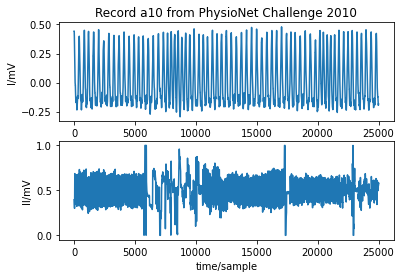

{'record_name': 'ecg-record',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 25000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['I', 'II'],
 'p_signal': array([[ 0.44253827,  0.39590136],
        [ 0.44253827,  0.39394818],
        [ 0.44253827,  0.3910184 ],
        ...,
        [-0.1858175 ,  0.57770013],
        [-0.18336524,  0.57184057],
        [-0.18336524,  0.56205939]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['ecg-record.dat', 'ecg-record.dat'],
 'fmt': ['16', '16'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [84819.78333333333, 65534.0],
 'baseline': [-7881, -32767],
 'units': ['mV', 'mV'],
 'adc_res': [16, 16],
 'adc_zero': [0, 0],
 'init_value': [29655, -6822],
 'checksum': [11804, 20438],
 'block_size': [0, 0]}

In [12]:
# Write a WFDB record without using a Record object via the gateway wrsamp function.
# This is the basic way to write physical signals to a WFDB file. 

# Read part of a record from Physionet
sig, fields = wfdb.rdsamp('a10', sampfrom=50000, channels=[0,1], pn_dir='challenge-2010/set-a/')

# Call the gateway wrsamp function, manually inserting fields as function input parameters
wfdb.wrsamp('ecg-record', fs=250, units=['mV', 'mV'], sig_name=['I', 'II'], p_signal=sig, fmt=['16', '16'])

# The new file can be read
record = wfdb.rdrecord('ecg-record')
wfdb.plot_wfdb(record=record, title='Record a10 from PhysioNet Challenge 2010') 
display(record.__dict__)

# ECG processing

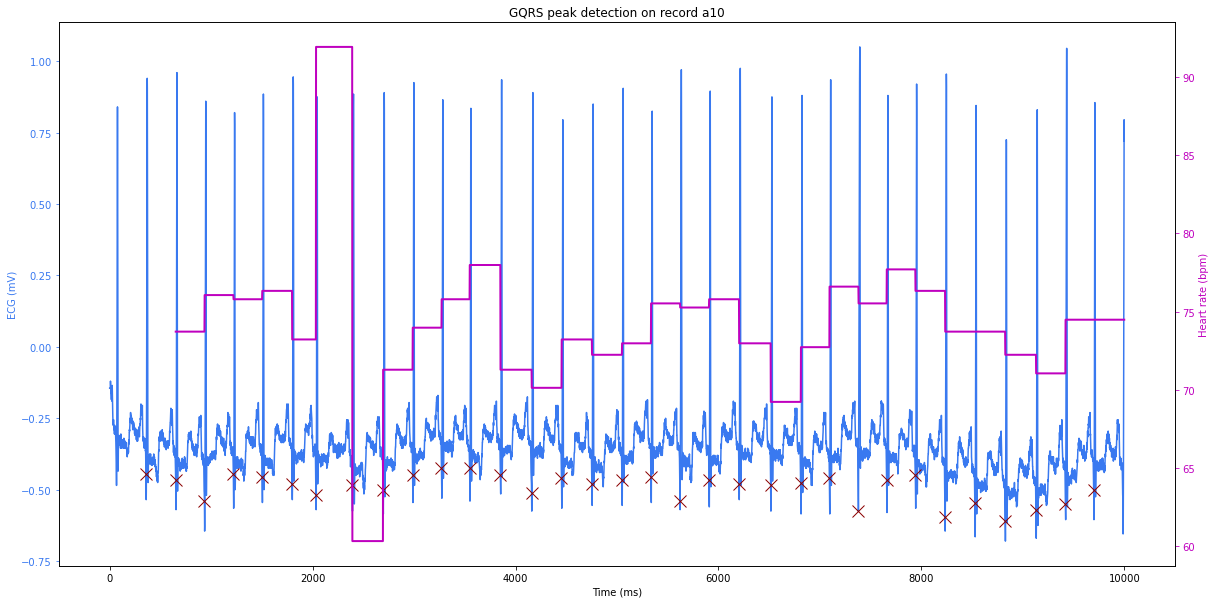

Corrected GQRS detected peak indices: [370, 663, 947, 1231, 1515, 1809, 2045, 2403, 2706, 2998, 3283, 3560, 3863, 4171, 4466, 4765, 5061, 5347, 5634, 5919, 6215, 6527, 6824, 7106, 7393, 7670, 7953, 8246, 8539, 8837, 9142, 9432, 9710]


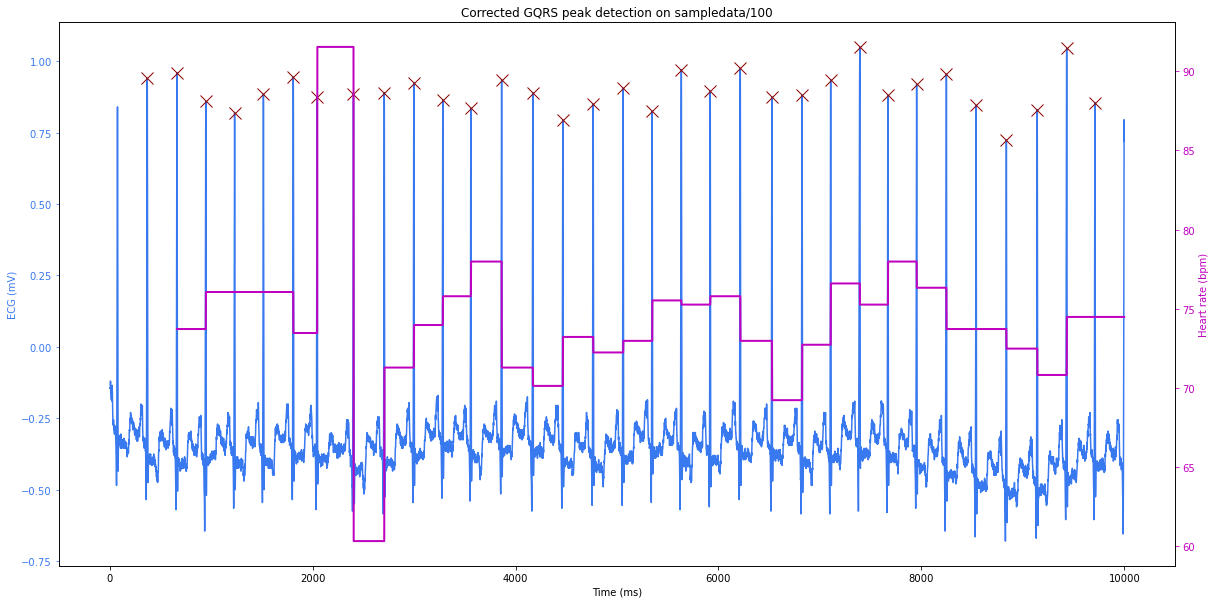

In [4]:
# Demo 19 - Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

# Load the WFDB record and the physical samples
record = wfdb.rdrecord('a10', pn_dir='challenge-2010/set-a/', sampfrom=0, sampto=10000, channels=[0])

record = wfdb.rdrecord('sample-data/100', sampfrom=0, sampto=10000, channels=[0])


# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record a10")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")